This block imports essential libraries (`pandas`, `matplotlib`, `seaborn`, and `numpy`) and loads the dataset from a CSV file. It provides an overview of the dataset, including shape, column names, data types, missing values, the first few rows, summary statistics, and class distribution in the `label` column if it exists.


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


# Load the dataset
df = pd.read_csv(r"C:\Users\shoba\Desktop\train_dataset.csv")

# Basic Overview
print("Dataset Shape:", df.shape)
print("\nColumn Names:\n", df.columns.tolist())
print("\nData Types:\n", df.dtypes)
print("\nMissing Values:\n", df.isnull().sum())
print("\nFirst 5 Rows:\n", df.head())

# Summary statistics
print("\nSummary Statistics:\n", df.describe(include='all'))

# Check class distribution (assuming 'label' is the target column)
if 'label' in df.columns:
    print("\nClass Distribution:\n", df['label'].value_counts())



Dataset Shape: (6728848, 60)

Column Names:
 ['url', 'label', 'source', 'url_has_login', 'url_has_client', 'url_has_server', 'url_has_admin', 'url_has_ip', 'url_isshorted', 'url_len', 'url_entropy', 'url_hamming_1', 'url_hamming_00', 'url_hamming_10', 'url_hamming_01', 'url_hamming_11', 'url_2bentropy', 'url_3bentropy', 'url_count_dot', 'url_count_https', 'url_count_http', 'url_count_perc', 'url_count_hyphen', 'url_count_www', 'url_count_atrate', 'url_count_hash', 'url_count_semicolon', 'url_count_underscore', 'url_count_ques', 'url_count_equal', 'url_count_amp', 'url_count_letter', 'url_count_digit', 'url_count_sensitive_financial_words', 'url_count_sensitive_words', 'url_nunique_chars_ratio', 'path_len', 'path_count_no_of_dir', 'path_count_no_of_embed', 'path_count_zero', 'path_count_pertwent', 'path_has_any_sensitive_words', 'path_count_lower', 'path_count_upper', 'path_count_nonascii', 'path_has_singlechardir', 'path_has_upperdir', 'query_len', 'query_count_components', 'pdomain_le

This block computes the correlation matrix of numerical features, filters for correlations with an absolute value greater than 0.3, and visualizes them using a heatmap to identify strong relationships between features.


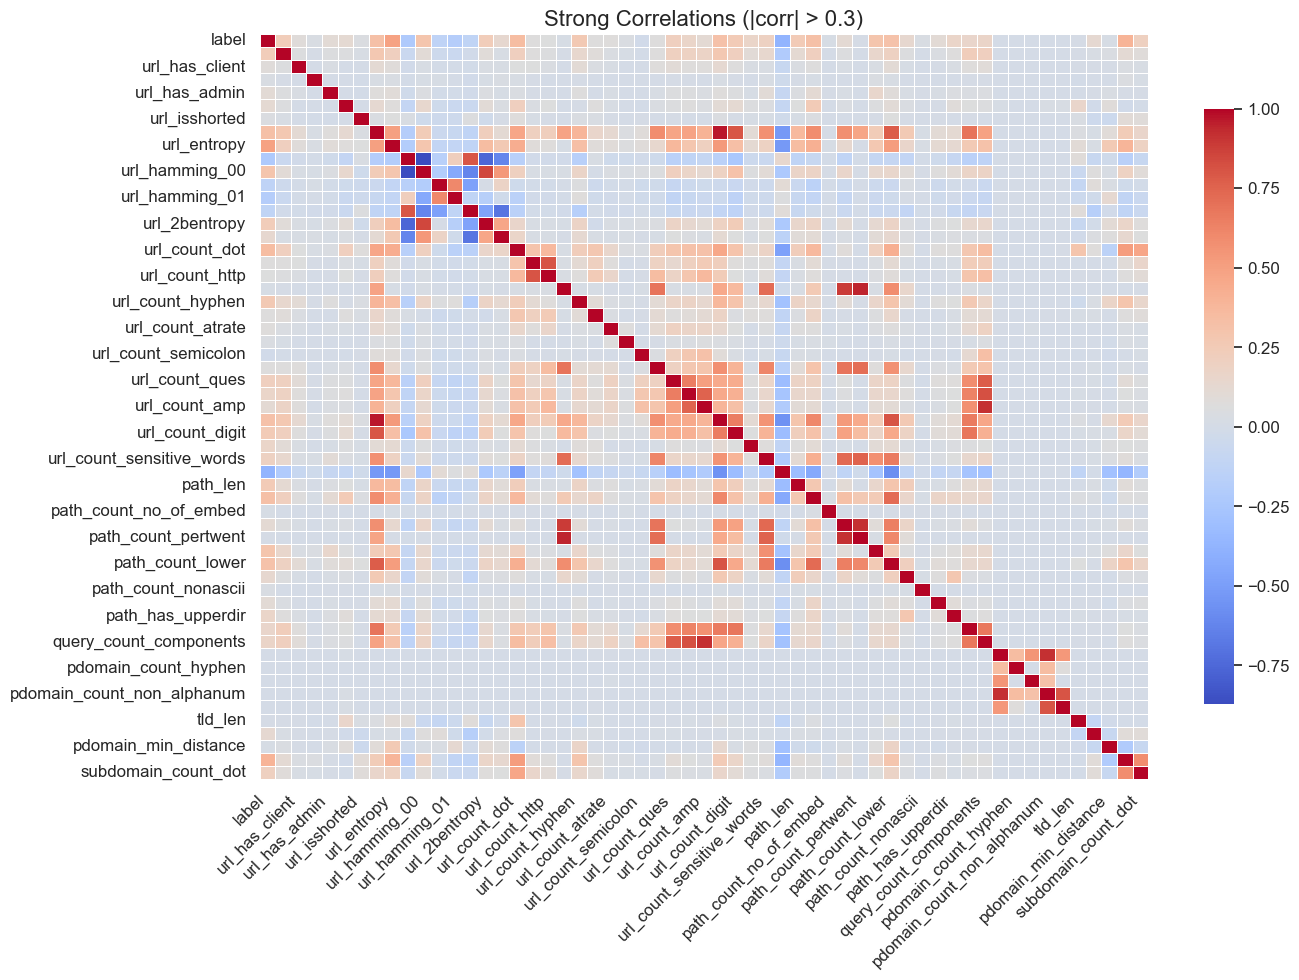

In [2]:
# Compute correlation matrix
corr = df.corr(numeric_only=True)

# Filter correlations with absolute value > 0.3
strong_corr = corr.loc[(corr.abs() > 0.3).any(axis=1), (corr.abs() > 0.3).any(axis=0)]

# Set up the plot
plt.figure(figsize=(14, 10))
sns.set(style="white", font_scale=1.1)

# Plot heatmap WITHOUT annotation
sns.heatmap(
    strong_corr,
    cmap='coolwarm',
    annot=False, 
    linewidths=0.5,
    cbar_kws={"shrink": 0.8}
)

plt.title("Strong Correlations (|corr| > 0.3)", fontsize=16)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()


This block visualizes the distribution of up to five numerical features using histograms with KDE overlays, helping assess feature distributions and potential outliers.


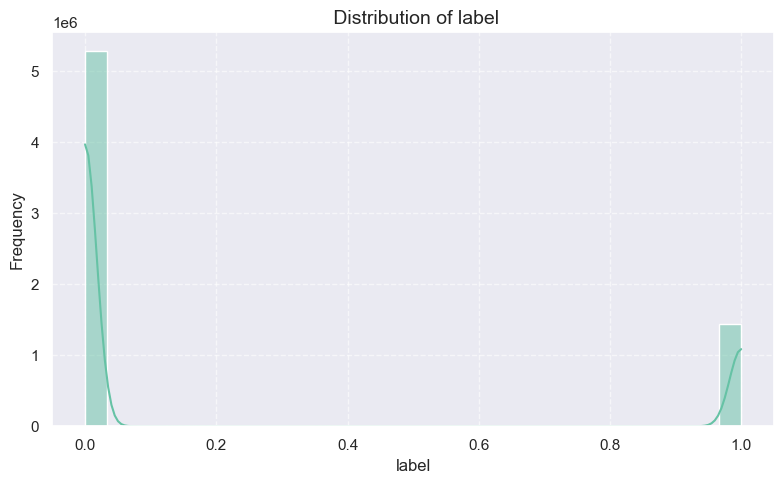

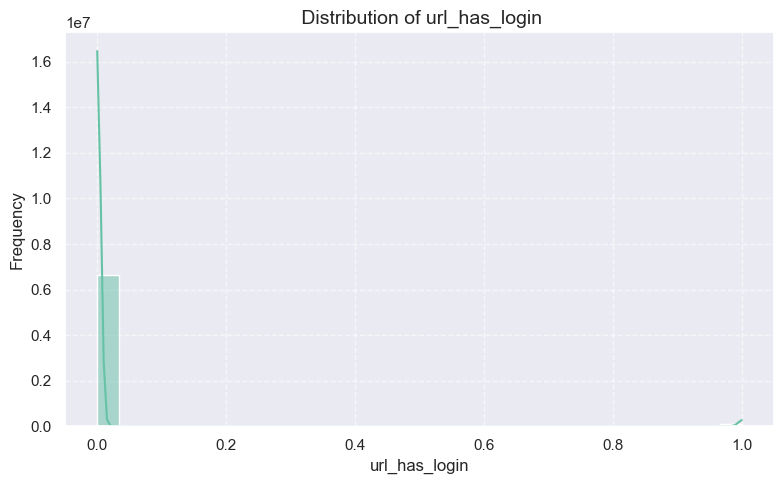

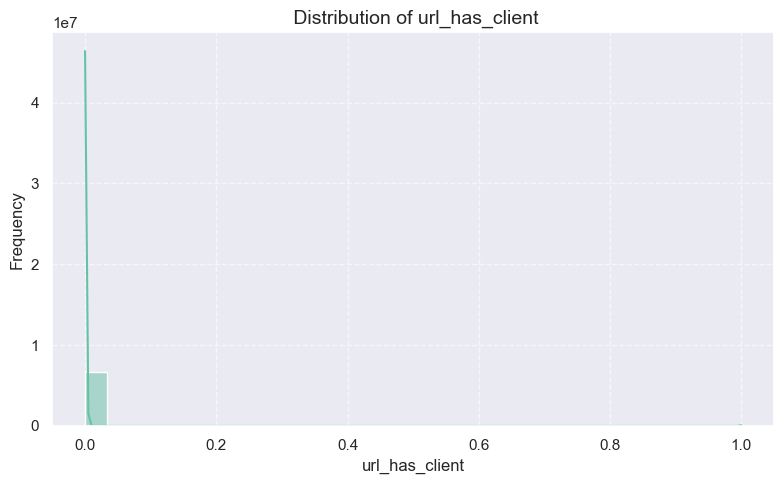

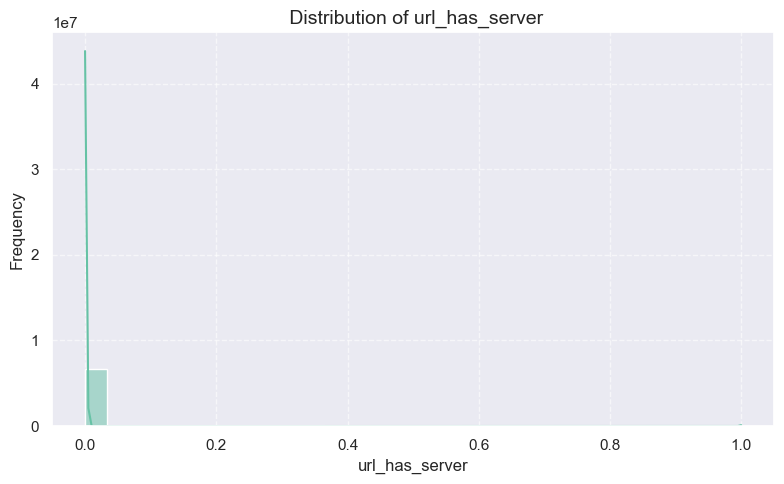

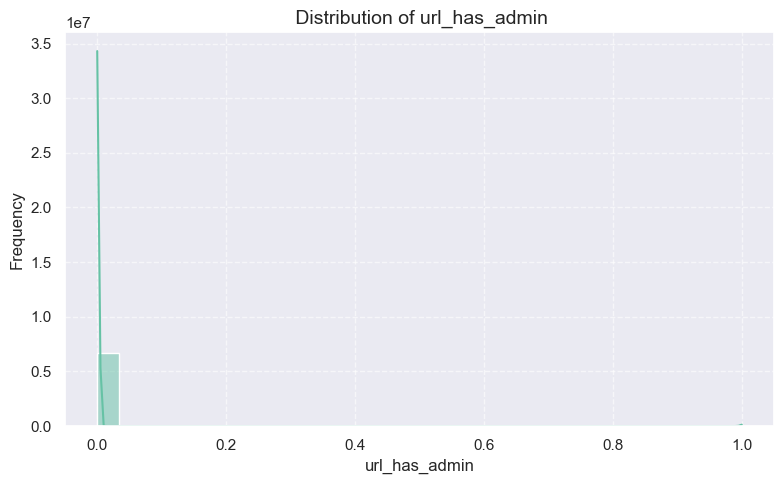

In [3]:
# Distribution of numerical features
sns.set(style="darkgrid", palette="Set2")
numerical_cols = df.select_dtypes(include=['float64', 'int64']).columns.tolist()

for col in numerical_cols[:5]:  # Limit for readability
    plt.figure(figsize=(8, 5))
    sns.histplot(df[col], kde=True, bins=30)
    plt.title(f' Distribution of {col}', fontsize=14)
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.grid(True, linestyle='--', alpha=0.6)
    plt.tight_layout()
    plt.show()


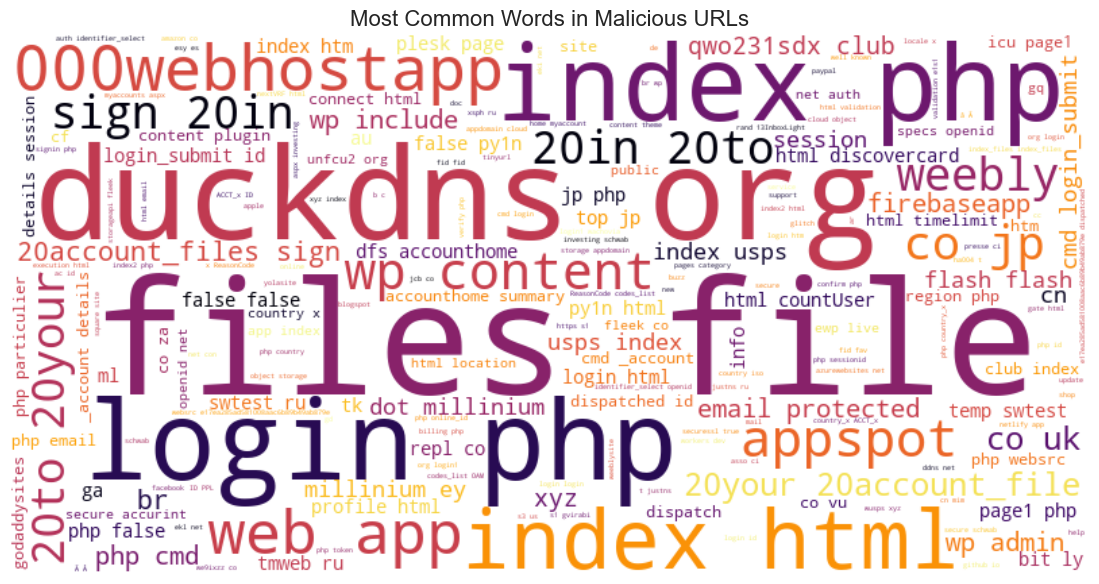

In [4]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Step 1: Filter only malicious URLs (label = 1)
malicious_urls = df[df['label'] == 1]['url']

# Step 2: Combine all malicious URLs into a single text
text = ' '.join(malicious_urls.astype(str))

# Step 3: Generate the word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white', colormap='inferno').generate(text)

# Step 4: Plot the word cloud
plt.figure(figsize=(12, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Most Common Words in Malicious URLs', fontsize=16)
plt.tight_layout()
plt.show()


This block visualizes feature distributions and outliers using boxplots, allowing comparison of distributions across different classes if grouped by a label.


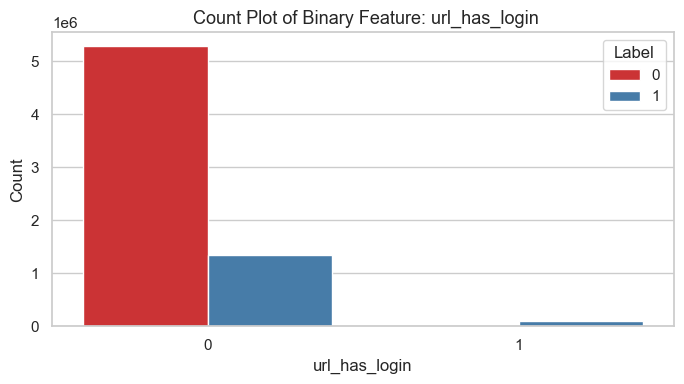

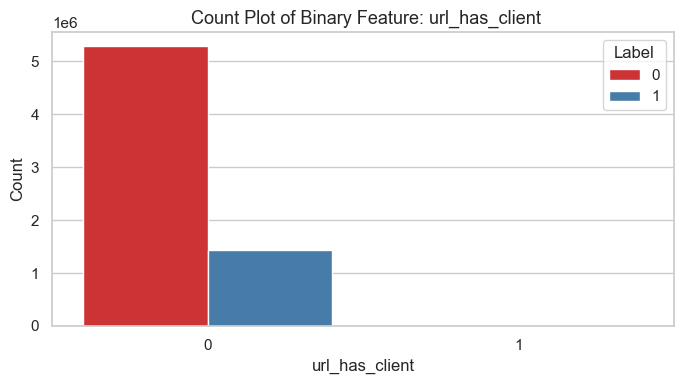

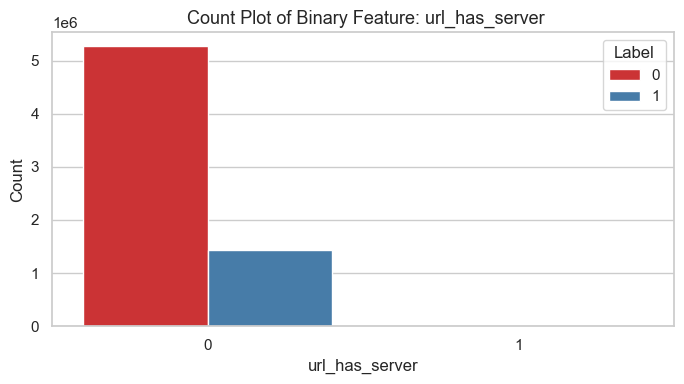

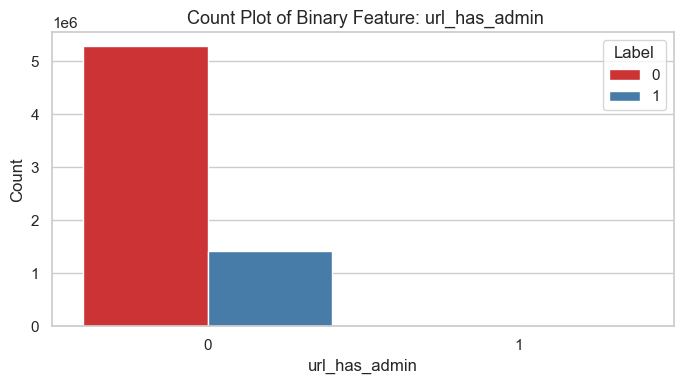

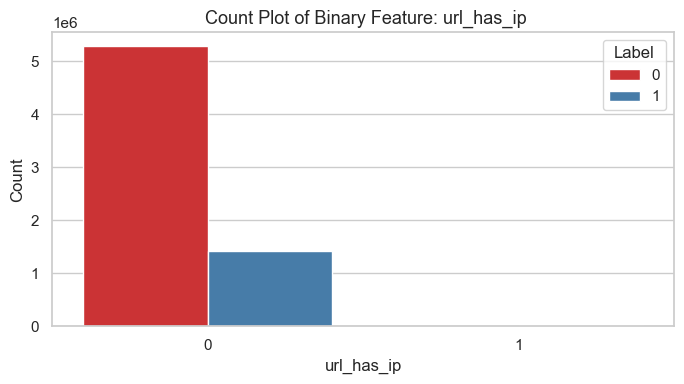

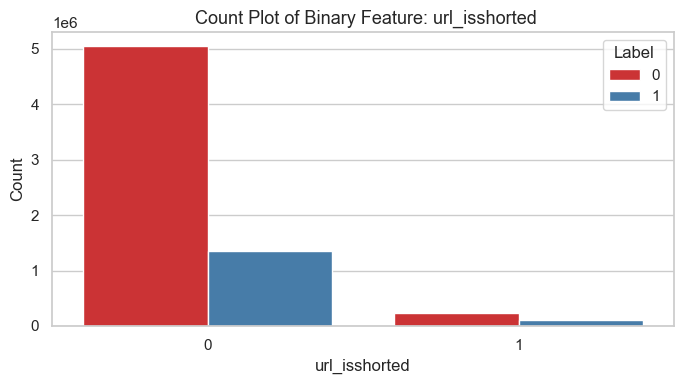

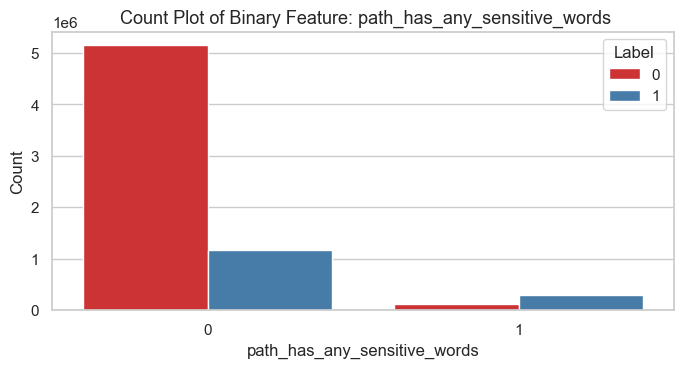

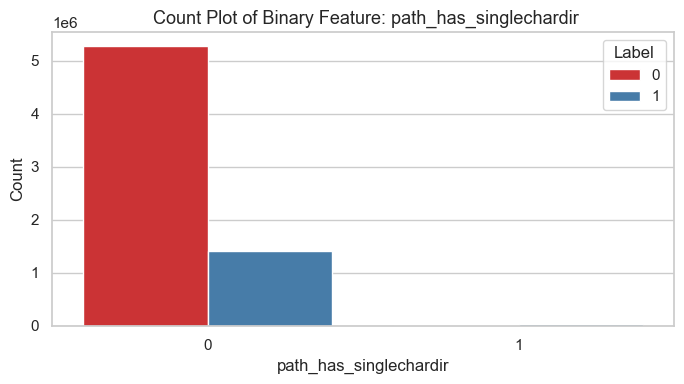

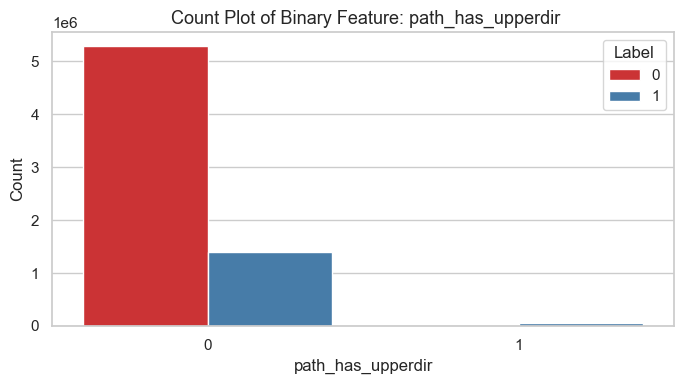

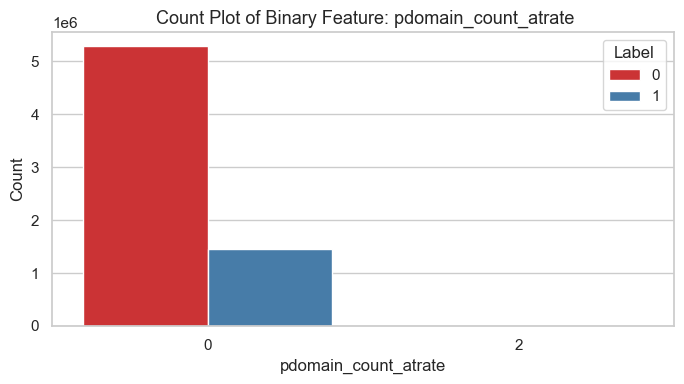

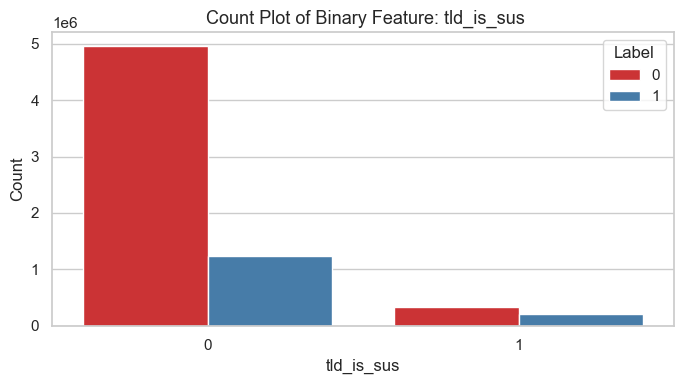

In [5]:
# Count plots for binary features
binary_cols = [col for col in df.columns if df[col].nunique() == 2 and col != 'label']

sns.set(style="whitegrid", palette="Set1")

for col in binary_cols:
    plt.figure(figsize=(7, 4))
    sns.countplot(data=df, x=col, hue='label' if 'label' in df.columns else None)
    plt.title(f' Count Plot of Binary Feature: {col}', fontsize=13)
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.legend(title='Label')
    plt.tight_layout()
    plt.show()


This block creates a pairplot to examine pairwise relationships between numerical features, helping identify potential clusters or separability of classes.
This also splits the dataset into training and test sets, preparing for model training and evaluation and standardizes numerical features using `StandardScaler`, ensuring consistent feature scaling for model training.



In [6]:
# Drop non-numeric columns (e.g., original URL, domain name)
X = df.drop(columns=['label'])

# Keep only numeric columns
X = X.select_dtypes(include=['int64', 'float64'])

# Re-assign target
y = df['label']

# Train-test split
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the numeric features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


The following code trains a classification model (e.g., Logistic Regression, Decision Tree, or Random Forest), makes predictions, and evaluates model performance using accuracy, ROC AUC, and a classification report.


In [7]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score, roc_auc_score

lr = LogisticRegression(max_iter=1000)
lr.fit(X_train_scaled, y_train)
y_pred_lr = lr.predict(X_test_scaled)
y_proba_lr = lr.predict_proba(X_test_scaled)[:, 1]

print("\n Model: Logistic Regression")
print("Accuracy:", accuracy_score(y_test, y_pred_lr))
print("ROC AUC Score:", roc_auc_score(y_test, y_proba_lr))
print("Classification Report:\n", classification_report(y_test, y_pred_lr))



 Model: Logistic Regression
Accuracy: 0.8870705989879399
ROC AUC Score: 0.9033946780275813
Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.97      0.93   1056595
           1       0.83      0.59      0.69    289175

    accuracy                           0.89   1345770
   macro avg       0.86      0.78      0.81   1345770
weighted avg       0.88      0.89      0.88   1345770



In [8]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, accuracy_score, roc_auc_score

# Add max_depth and min_samples_split for faster training
dt = DecisionTreeClassifier(max_depth=10, min_samples_split=10, random_state=42)
dt.fit(X_train_scaled, y_train)
y_pred_dt = dt.predict(X_test_scaled)
y_proba_dt = dt.predict_proba(X_test_scaled)[:, 1]

print("\n Model: Decision Tree (Optimized)")
print("Accuracy:", accuracy_score(y_test, y_pred_dt))
print("ROC AUC Score:", roc_auc_score(y_test, y_proba_dt))
print("Classification Report:\n", classification_report(y_test, y_pred_dt))



 Model: Decision Tree (Optimized)
Accuracy: 0.9115866752862674
ROC AUC Score: 0.9169906174606788
Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.96      0.94   1056595
           1       0.84      0.73      0.78    289175

    accuracy                           0.91   1345770
   macro avg       0.88      0.85      0.86   1345770
weighted avg       0.91      0.91      0.91   1345770



In [9]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, roc_auc_score

# Optimized Random Forest: faster & less resource-intensive
rf = RandomForestClassifier(
    n_estimators=50,        # fewer trees
    max_depth=10,           # shallower trees
    random_state=42,
    n_jobs=-1               # use all CPU cores
)

rf.fit(X_train_scaled, y_train)
y_pred_rf = rf.predict(X_test_scaled)
y_proba_rf = rf.predict_proba(X_test_scaled)[:, 1]

print("\n Model: Random Forest (Optimized)")
print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print("ROC AUC Score:", roc_auc_score(y_test, y_proba_rf))
print("Classification Report:\n", classification_report(y_test, y_pred_rf))



 Model: Random Forest (Optimized)
Accuracy: 0.9137594091115123
ROC AUC Score: 0.9226992945570747
Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.98      0.95   1056595
           1       0.91      0.67      0.77    289175

    accuracy                           0.91   1345770
   macro avg       0.91      0.82      0.86   1345770
weighted avg       0.91      0.91      0.91   1345770



This block contains custom logic or visualization to support data exploration or model evaluation.


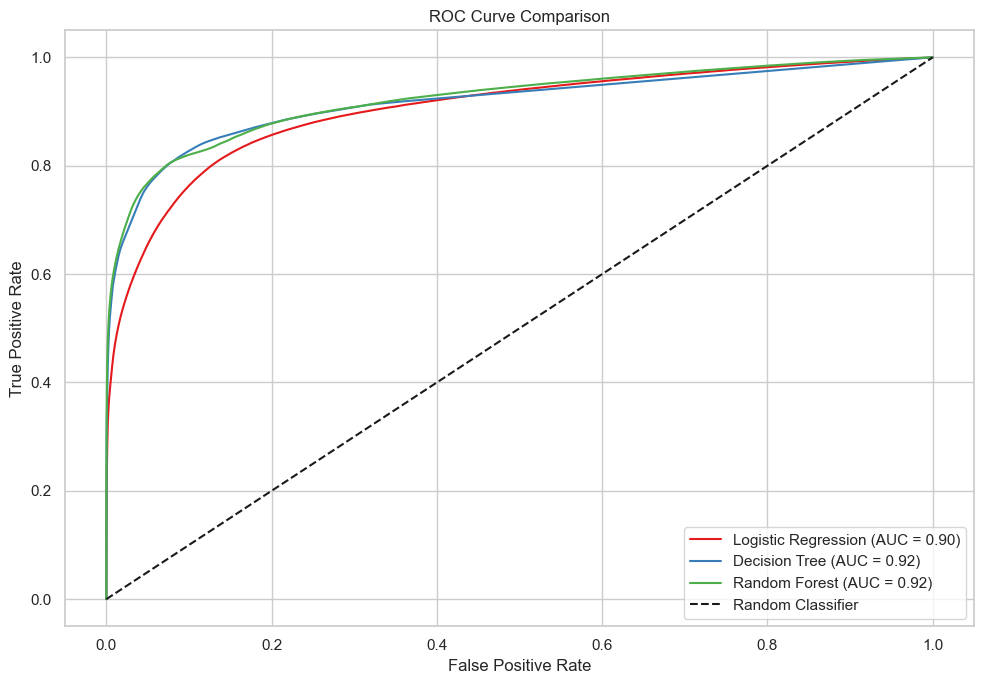

In [10]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# Compute ROC curves and AUC scores
fpr_lr, tpr_lr, _ = roc_curve(y_test, y_proba_lr)
fpr_dt, tpr_dt, _ = roc_curve(y_test, y_proba_dt)
fpr_rf, tpr_rf, _ = roc_curve(y_test, y_proba_rf)

auc_lr = auc(fpr_lr, tpr_lr)
auc_dt = auc(fpr_dt, tpr_dt)
auc_rf = auc(fpr_rf, tpr_rf)

# Plot
plt.figure(figsize=(10, 7))
plt.plot(fpr_lr, tpr_lr, label=f'Logistic Regression (AUC = {auc_lr:.2f})')
plt.plot(fpr_dt, tpr_dt, label=f'Decision Tree (AUC = {auc_dt:.2f})')
plt.plot(fpr_rf, tpr_rf, label=f'Random Forest (AUC = {auc_rf:.2f})')

# Reference line
plt.plot([0, 1], [0, 1], 'k--', label='Random Classifier')

# Formatting
plt.title('ROC Curve Comparison')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.grid(True)
plt.tight_layout()
plt.show()


##  Anomaly Detection with Isolation Forest

In [13]:
from sklearn.ensemble import IsolationForest
import pandas as pd

# Step 1: Keep only numeric columns
X_features = df.drop(columns=['label'])  # Drop label
X_features = X_features.select_dtypes(include=['int64', 'float64'])  # Keep only numeric

# Step 2: Train Isolation Forest
from sklearn.ensemble import IsolationForest

iso_forest = IsolationForest(
    n_estimators=100,
    contamination=0.05,
    random_state=42
)
iso_forest.fit(X_features)

# Step 3: Predict anomalies
anomaly_predictions = iso_forest.predict(X_features)

# Step 4: Add anomaly predictions back
df['anomaly'] = anomaly_predictions

# Step 5: Check results
print(df['anomaly'].value_counts())
print("\nExample Anomalies Detected:")
print(df[df['anomaly'] == -1].head())


anomaly
 1    6392405
-1     336443
Name: count, dtype: int64

Example Anomalies Detected:
                                                  url  label  \
24               amazon-co.jp.master-confirmation.xyz      1   
36  djfreshtech.in/alibaba/ali/login.php/__MACOSX/...      1   
37  justclean-pressing.fr/06265/--/he3lpd894cvV456...      1   
39  sharepoint-file-doc.s3-web.jp-tok.cloud-object...      1   
59  signin.eday.co.uk.ws.eayi.sapi.dllsign.inusing...      1   

                  source  url_has_login  url_has_client  url_has_server  \
24  ALL-phishing-domains              0               0               0   
36    ALL-phishing-links              1               0               0   
37    ALL-phishing-links              0               0               0   
39    ALL-phishing-links              0               0               0   
59  ALL-phishing-domains              0               0               0   

    url_has_admin  url_has_ip  url_isshorted  url_len  ...  \
24         

### The PCA scatter plot clearly visualizes the clustering of normal URLs and separation of anomalous URLs, demonstrating the ability of Isolation Forest to identify potentially malicious activities.

C:\Users\shoba\AppData\Local\Temp\ipykernel_28084\1696537036.py:36: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.tight_layout()
c:\Users\shoba\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


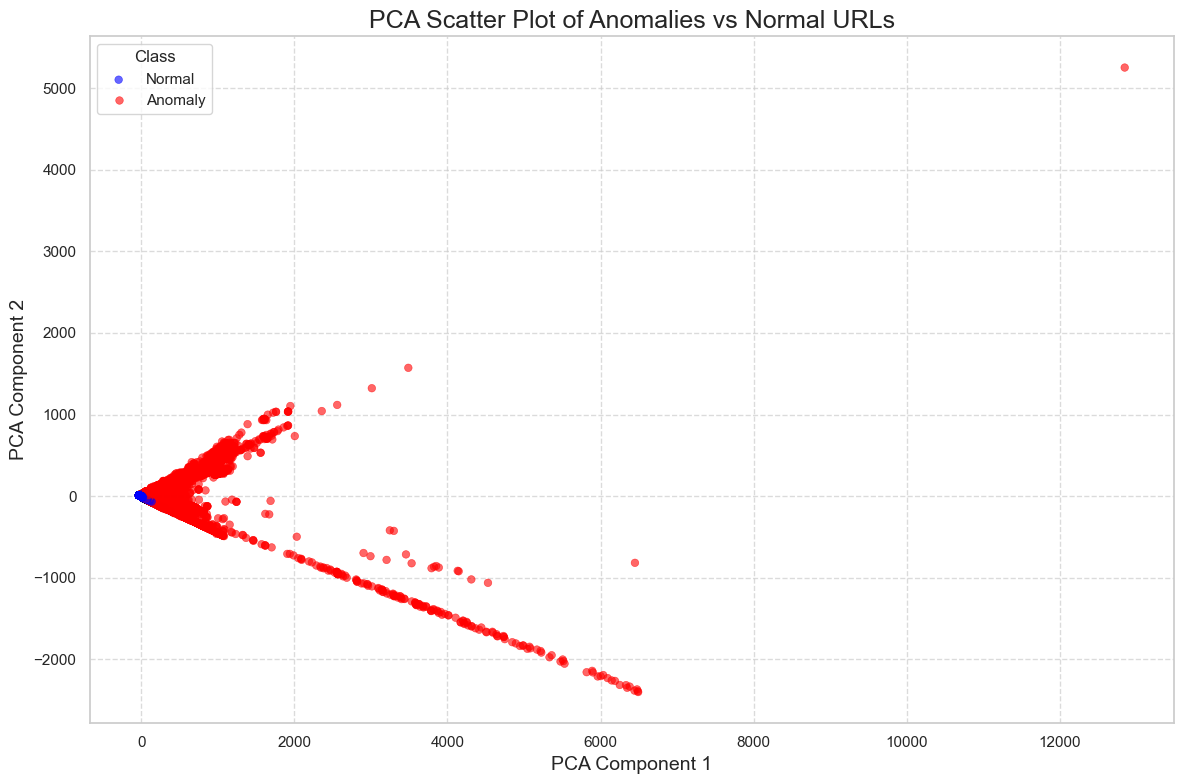

In [16]:
import seaborn as sns
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Step 1: Select numeric features (ONLY drop 'label')
X_numeric = df.select_dtypes(include=['int64', 'float64']).drop(columns=['label'])

# Step 2: Apply PCA
pca = PCA(n_components=2, random_state=42)
X_pca = pca.fit_transform(X_numeric)

# Step 3: Create a new dataframe for plotting
pca_df = pd.DataFrame(X_pca, columns=['PCA1', 'PCA2'])
pca_df['Anomaly'] = df['anomaly']

# Step 4: Fancy scatter plot
plt.figure(figsize=(12, 8))
sns.set(style="whitegrid")

sns.scatterplot(
    data=pca_df,
    x='PCA1', y='PCA2',
    hue='Anomaly',
    palette={1: 'blue', -1: 'red'},
    alpha=0.6,
    s=30,
    edgecolor=None,
    legend="full"
)

plt.title('PCA Scatter Plot of Anomalies vs Normal URLs', fontsize=18)
plt.xlabel('PCA Component 1', fontsize=14)
plt.ylabel('PCA Component 2', fontsize=14)
plt.legend(title='Class', labels=['Normal', 'Anomaly'])
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()
